Projekat 2

Importovanje biblioteka

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Ucitavanje podataka

In [2]:
data = pd.read_csv('customer_segmentation.csv')
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [3]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [4]:
data = data.rename(
    columns={
                "MntWines": "Wines",
                "MntFruits":"Fruits",
                "MntMeatProducts":"Meat",
                "MntFishProducts":"Fish",
                "MntSweetProducts":"Sweets",
                "MntGoldProds":"Gold",
                "NumDealPurchases":"Deal Purchases",
                "NumWebPurchases":"Web Purchases",
                "NumCatalogPurchases":"Catalog Purchases",
                "NumStorePurchases":"Store Purchases",
                "NumWebVisitsMonth":"Web visits per Month"
            })

In [5]:
#Education i Marital_status su kategoricki atributi, pa cemo ih naknadno enkodirati

print(data['Education'].unique())
print(data['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [6]:
#Provera nedostajucih vrednosti 
data.isnull().sum()

ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                  24
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
Wines                    0
Fruits                   0
Meat                     0
Fish                     0
Sweets                   0
Gold                     0
NumDealsPurchases        0
Web Purchases            0
Catalog Purchases        0
Store Purchases          0
Web visits per Month     0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
dtype: int64

In [7]:
data['Income'].fillna(data['Income'].median(), inplace = True)
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
Wines                   0
Fruits                  0
Meat                    0
Fish                    0
Sweets                  0
Gold                    0
NumDealsPurchases       0
Web Purchases           0
Catalog Purchases       0
Store Purchases         0
Web visits per Month    0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
#Provera duplikata
data.duplicated(subset=None, keep='first')


0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [9]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'],format='%d-%m-%Y')
data.dtypes

ID                               int64
Year_Birth                       int64
Education                       object
Marital_Status                  object
Income                         float64
Kidhome                          int64
Teenhome                         int64
Dt_Customer             datetime64[ns]
Recency                          int64
Wines                            int64
Fruits                           int64
Meat                             int64
Fish                             int64
Sweets                           int64
Gold                             int64
NumDealsPurchases                int64
Web Purchases                    int64
Catalog Purchases                int64
Store Purchases                  int64
Web visits per Month             int64
AcceptedCmp3                     int64
AcceptedCmp4                     int64
AcceptedCmp5                     int64
AcceptedCmp1                     int64
AcceptedCmp2                     int64
Complain                 

In [10]:
max(data['Dt_Customer'])


Timestamp('2014-06-29 00:00:00')

In [11]:
min(data['Dt_Customer'])

Timestamp('2012-07-30 00:00:00')

In [12]:
# Zapamti kolonu 'Dt_Customer'
dt_customer_column = data['Dt_Customer']

# Izbačaj kolonu 'Dt_Customer' iz skupa kolona u data
data.drop(columns=['Dt_Customer'], inplace=True)

# Dodaj kolonu 'Dt_Customer' iza kolone 'ID'
data.insert(1, 'Dt_Customer', dt_customer_column)


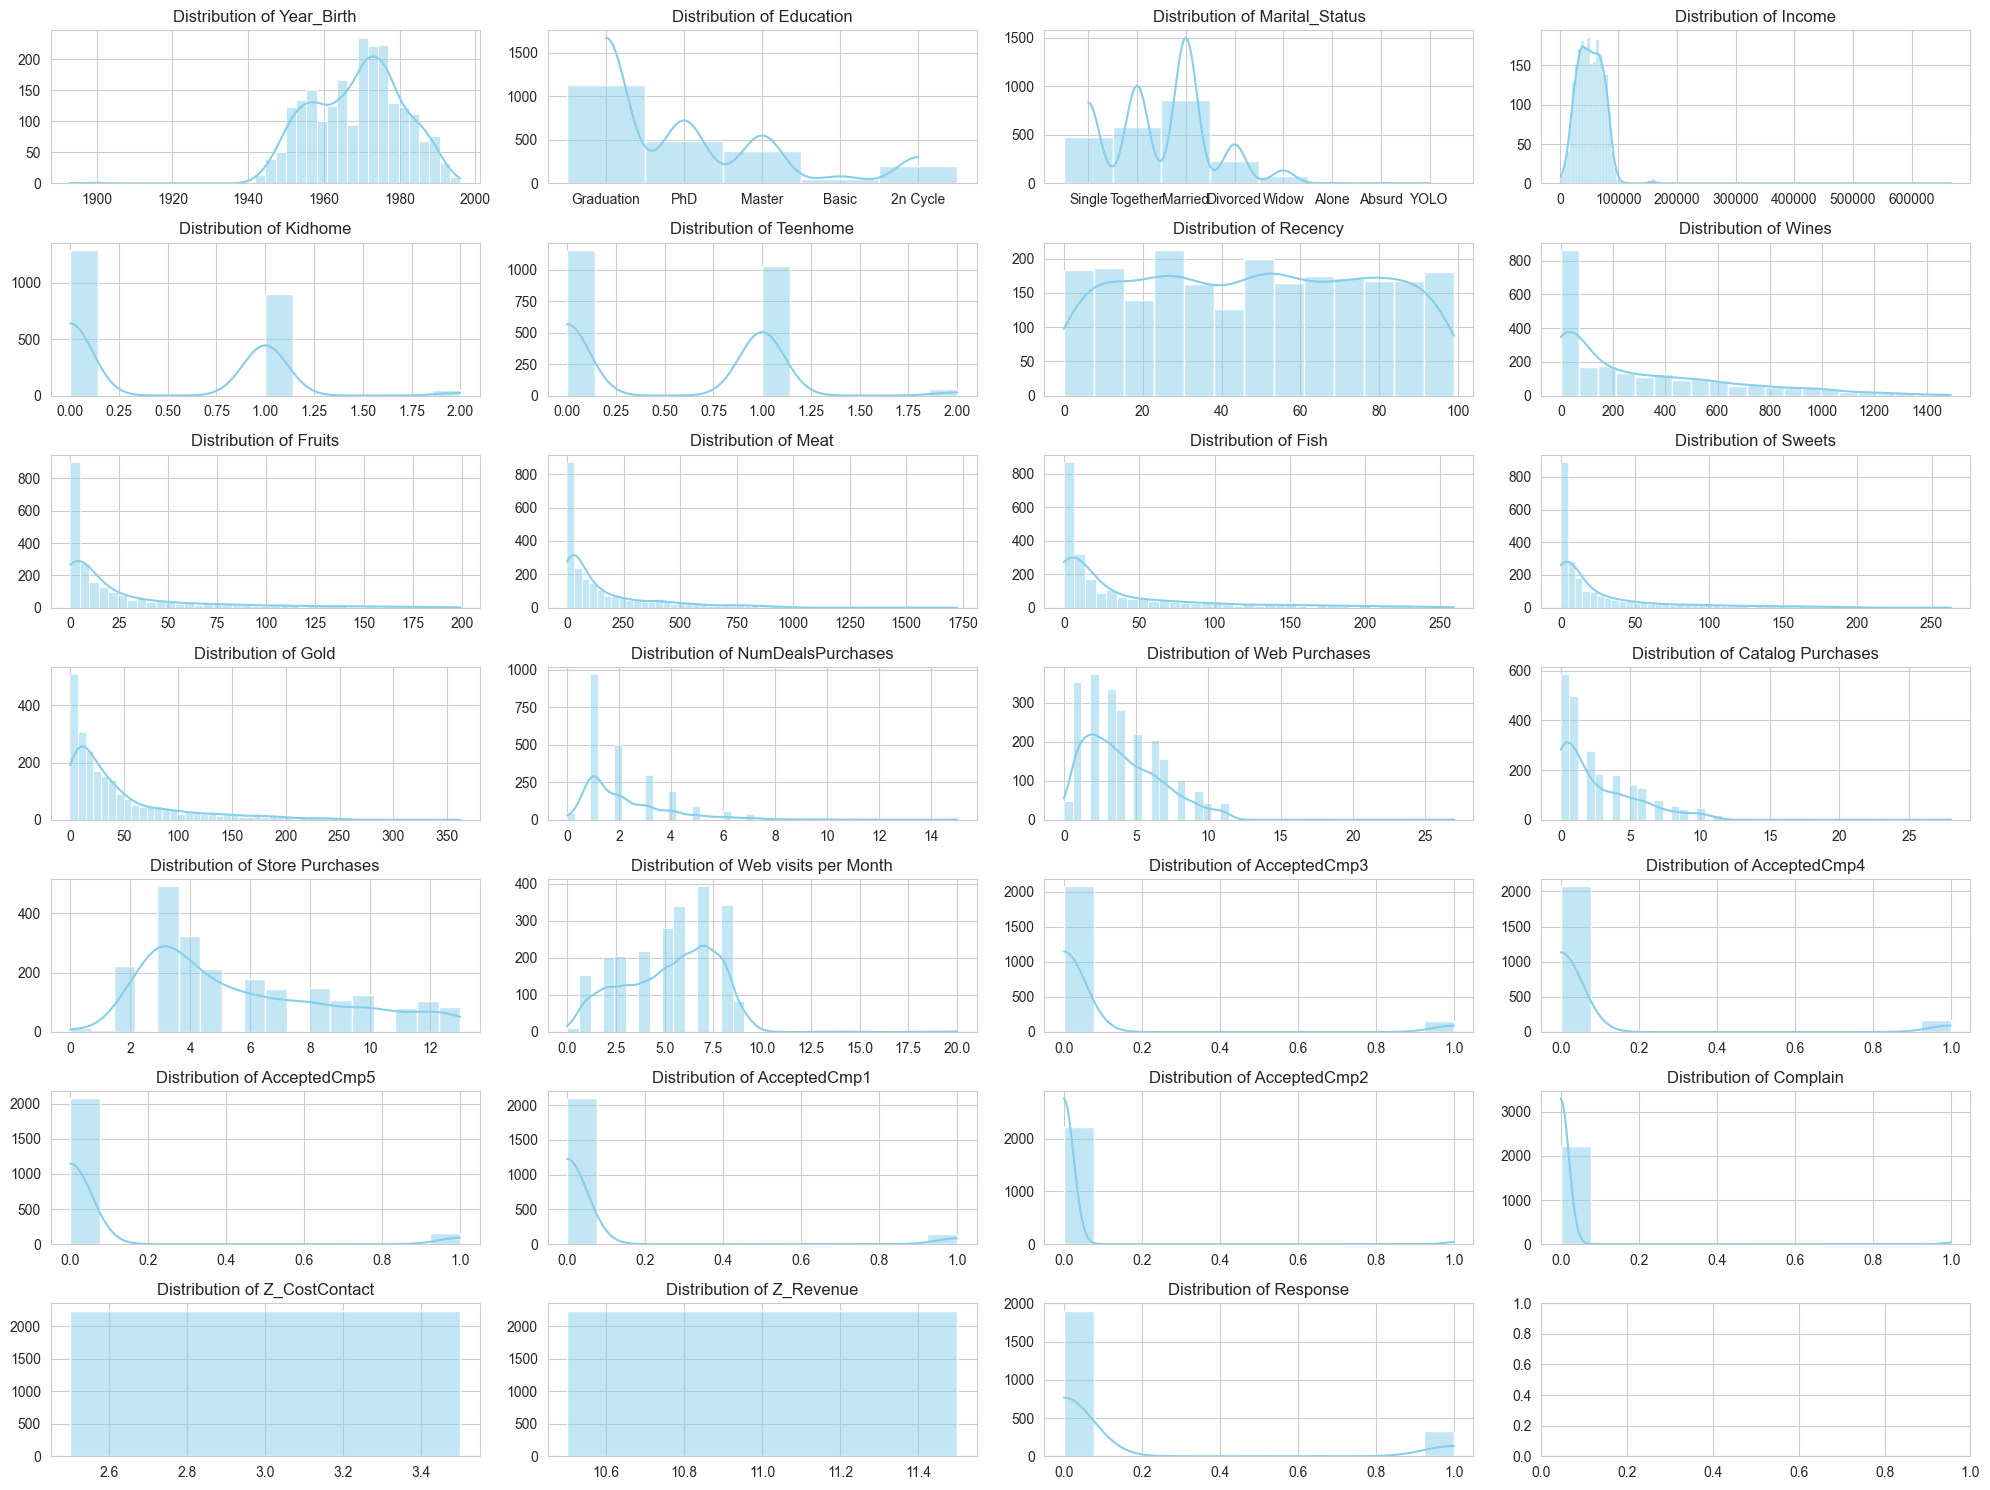

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Postavljanje stila za grafike
sns.set_style("whitegrid")
#column_dt_customer = data['Dt_Customer']

# Broj kolona i redova u subplotu
num_cols = 4  # Broj kolona
num_rows = (len(data.columns) - 2) // num_cols + 1  # Broj redova

# Kreiranje subplota
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Iteriranje kroz sve kolone osim 'Dt_Customer'
for i, column in enumerate(data.columns[2:]):
    #if column != 'Dt_Customer':
        row = i // num_cols
        col = i % num_cols
        sns.histplot(data[column], kde=True, ax=axes[row, col], color='skyblue')
        axes[row, col].set_title(f'Distribution of {column}', fontsize=12)
        axes[row, col].set_xlabel('')
        axes[row, col].set_ylabel('')

# Uklanjanje praznih subplotova
for i in range(len(data.columns[1:]), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Podešavanje rasporeda
plt.tight_layout()
plt.show()



Kako su vrednosti atributa 'Z_CostContact' i 'Z_Revenue' za svaki podatak iste, izbacicemo ove atribute, jer ne donose nikakvu informaciju.

In [14]:
data = data.drop(columns=['Z_CostContact', 'Z_Revenue'])

C:\Users\Kaca\AppData\Local\Temp\ipykernel_12988\1049609643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=a, ax=axes[i], palette="pastel")
C:\Users\Kaca\AppData\Local\Temp\ipykernel_12988\1049609643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=a, ax=axes[i], palette="pastel")


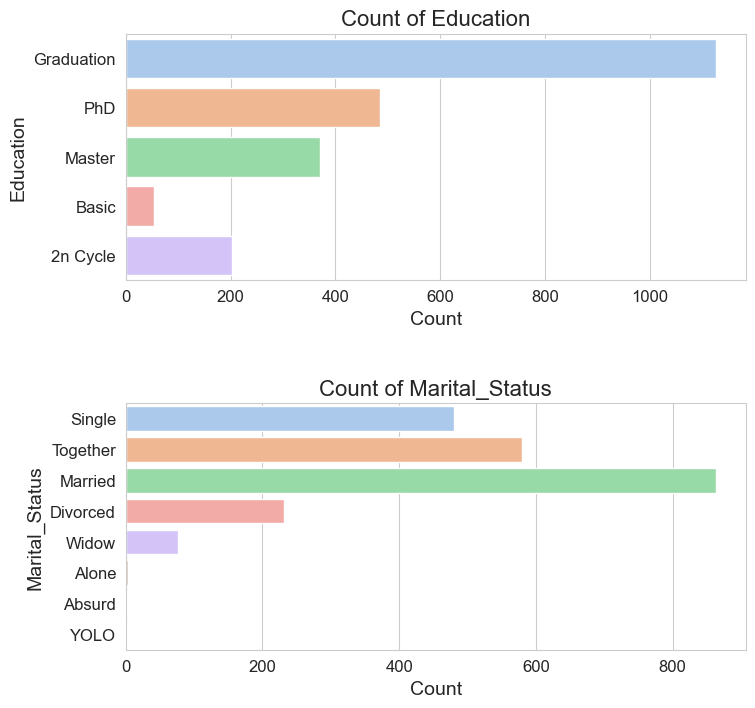

In [15]:
kategoricki_atributi = ['Education','Marital_Status']
sns.set_style("whitegrid")

# Definisanje brojača za iteraciju kroz kategoricki_atributi
num_plots = len(kategoricki_atributi)

# Postavljanje dimenzija grafika
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 4 * num_plots))

# Iteriranje kroz kategoricki_atributi i crtanje countplot-a za svaki atribut
for i, a in enumerate(kategoricki_atributi):
    sns.countplot(data=data, y=a, ax=axes[i], palette="pastel")
    axes[i].set_title(f'Count of {a}', fontsize=16)
    axes[i].set_ylabel(a, fontsize=14)
    axes[i].set_xlabel('Count', fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)

# Podešavanje razmaka između subplotova
plt.subplots_adjust(hspace=0.5)

# Prikazivanje grafika
plt.show()

In [16]:
# Kreiranje rečnika koji mapira stare vrednosti u nove vrednosti
mapping = {
    'Master': 'Advanced',
    'PhD': 'Advanced',
    'Graduation': 'Graduate',
    '2n Cycle': 'Undergraduate',
    'Basic':'Undergraduate'
}

# Zamena vrednosti u koloni 'Education' koristeći rečnik
data['Education'] = data['Education'].replace(mapping)

In [17]:
# Kreiranje rečnika koji mapira stare vrednosti u nove vrednosti
mapping = {
    'Single': 'Single',
    'Together': 'Couple',
    'Married': 'Couple',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
}

# Dodavanje novih kolona 'Slobodan' i 'Zauzet' na osnovu mapiranja
data['Marital_Status'] = data['Marital_Status'].replace(mapping)


In [18]:
# Zamena 'Alone' i 'Absurd' sa 'Single'
#data['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO', 'Widow'], 'Single', inplace=True)
#data['Education'].replace('Basic', 'Graduation', inplace=True)


C:\Users\Kaca\AppData\Local\Temp\ipykernel_12988\1149114140.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=a, ax=axes[i], palette="pastel")
C:\Users\Kaca\AppData\Local\Temp\ipykernel_12988\1149114140.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=a, ax=axes[i], palette="pastel")


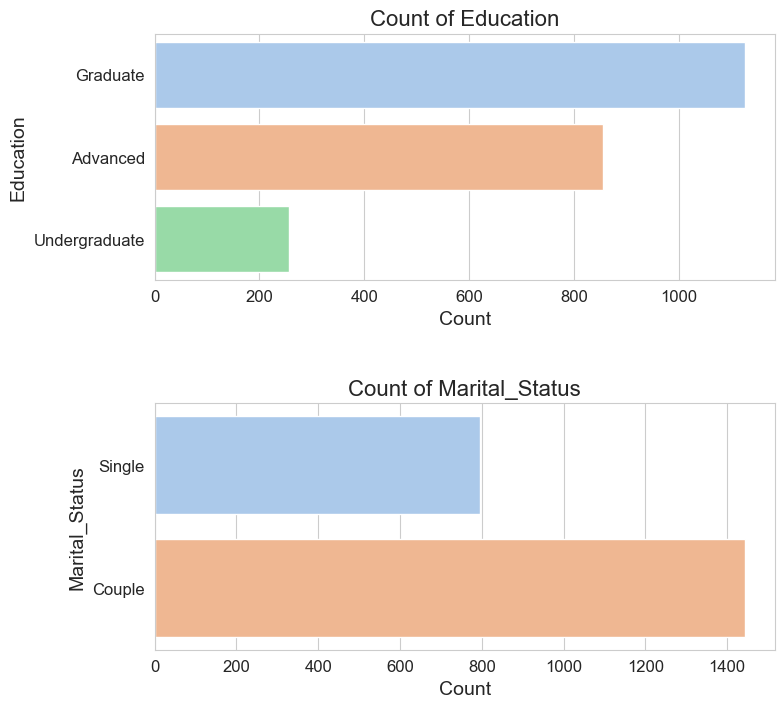

In [19]:
sns.set_style("whitegrid")

# Definisanje brojača za iteraciju kroz kategoricki_atributi
num_plots = len(kategoricki_atributi)

# Postavljanje dimenzija grafika
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 4 * num_plots))

# Iteriranje kroz kategoricki_atributi i crtanje countplot-a za svaki atribut
for i, a in enumerate(kategoricki_atributi):
    sns.countplot(data=data, y=a, ax=axes[i], palette="pastel")
    axes[i].set_title(f'Count of {a}', fontsize=16)
    axes[i].set_ylabel(a, fontsize=14)
    axes[i].set_xlabel('Count', fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)

# Podešavanje razmaka između subplotova
plt.subplots_adjust(hspace=0.5)

# Prikazivanje grafika
plt.show()

corr_data = data.drop(columns=kategoricki_atributi)
corr_data = corr_data.drop(columns=['ID', 'Dt_Customer'])

In [20]:
LE = LabelEncoder()
data['Marital_Status'] = data[['Marital_Status']].apply(LE.fit_transform)

In [21]:
encoded_data = pd.get_dummies(data, columns=['Education'])
encoded_data

,ID,Dt_Customer,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_Advanced,Education_Graduate,Education_Undergraduate
0,5524,2012-09-04,1957,1,58138.0,0,0,58,635,88,...,0,0,0,0,0,0,1,False,True,False
1,2174,2014-03-08,1954,1,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,0,False,True,False
2,4141,2013-08-21,1965,0,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,0,False,True,False
3,6182,2014-02-10,1984,0,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,0,False,True,False
4,5324,2014-01-19,1981,0,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2013-06-13,1967,0,61223.0,0,1,46,709,43,...,0,0,0,0,0,0,0,False,True,False
2236,4001,2014-06-10,1946,0,64014.0,2,1,56,406,0,...,0,0,0,1,0,0,0,True,False,False
2237,7270,2014-01-25,1981,1,56981.0,0,0,91,908,48,...,0,1,0,0,0,0,0,False,True,False
2238,8235,2014-01-24,1956,0,69245.0,0,1,8,428,30,...,0,0,0,0,0,0,0,True,False,False


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]),
 [Text(0.5, 0, 'Year_Birth'),
  Text(1.5, 0, 'Income'),
  Text(2.5, 0, 'Kidhome'),
  Text(3.5, 0, 'Teenhome'),
  Text(4.5, 0, 'Recency'),
  Text(5.5, 0, 'Wines'),
  Text(6.5, 0, 'Fruits'),
  Text(7.5, 0, 'Meat'),
  Text(8.5, 0, 'Fish'),
  Text(9.5, 0, 'Sweets'),
  Text(10.5, 0, 'Gold'),
  Text(11.5, 0, 'NumDealsPurchases'),
  Text(12.5, 0, 'Web Purchases'),
  Text(13.5, 0, 'Catalog Purchases'),
  Text(14.5, 0, 'Store Purchases'),
  Text(15.5, 0, 'Web visits per Month'),
  Text(16.5, 0, 'AcceptedCmp3'),
  Text(17.5, 0, 'AcceptedCmp4'),
  Text(18.5, 0, 'AcceptedCmp5'),
  Text(19.5, 0, 'AcceptedCmp1'),
  Text(20.5, 0, 'AcceptedCmp2'),
  Text(21.5, 0, 'Complain'),
  Text(22.5, 0, 'Response')])

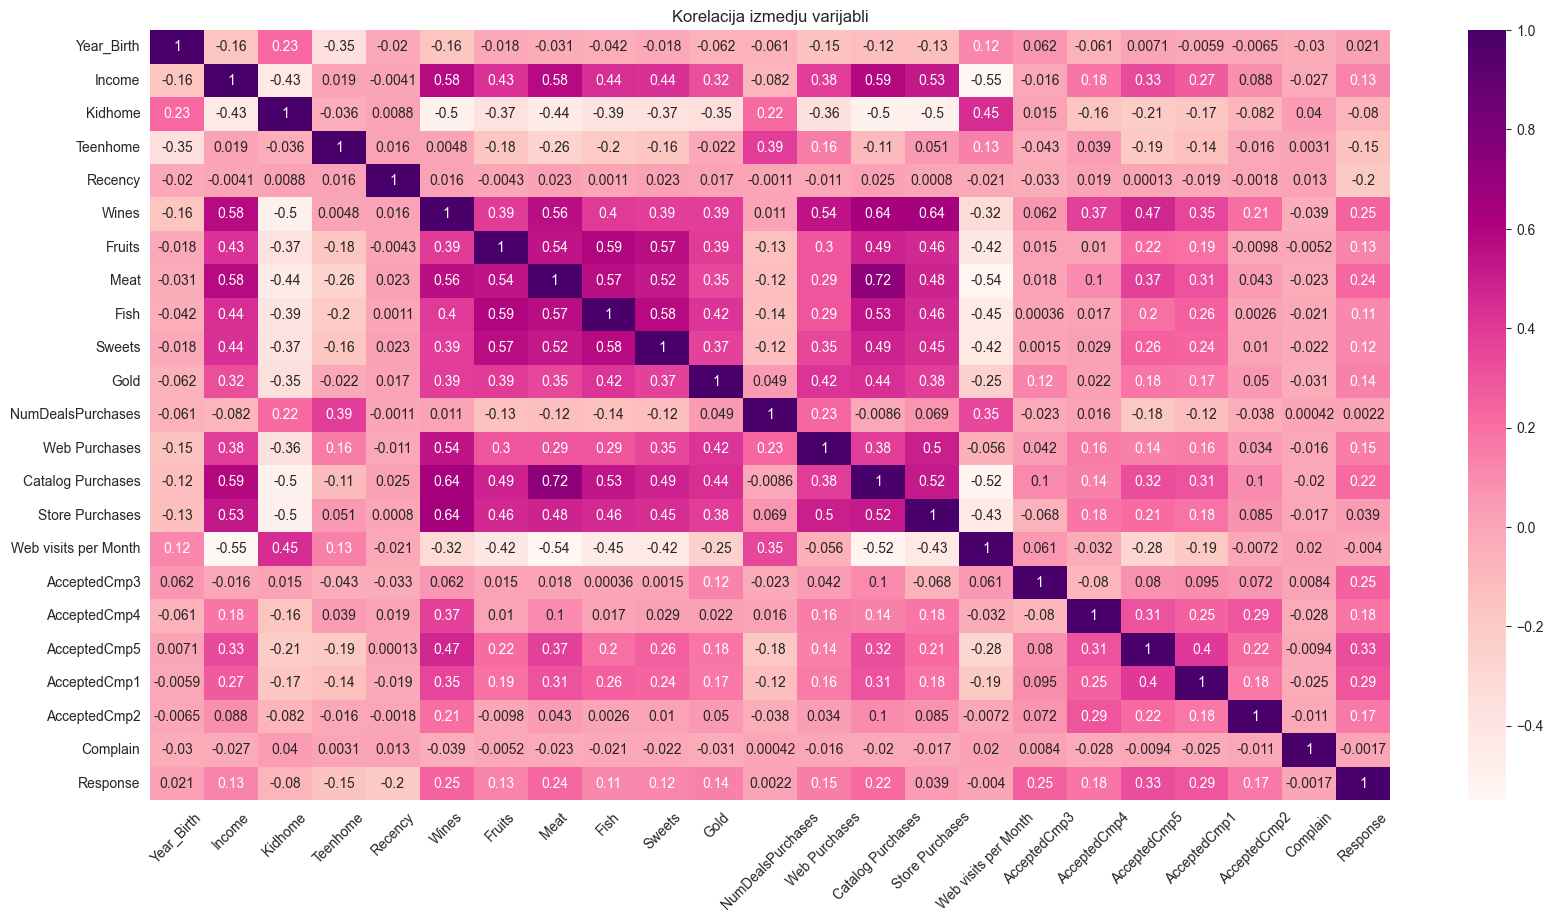

In [22]:
plt.subplots(figsize=(20,10))
correlation=corr_data.corr()
sns.heatmap(correlation,annot=True,cmap='RdPu')
plt.title('Correlation between variables')
plt.xticks(rotation=45)

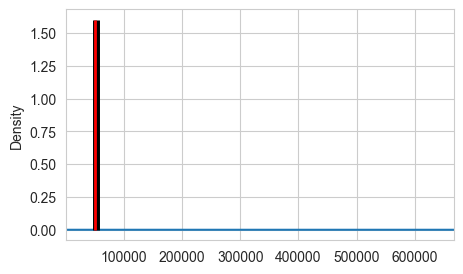

In [27]:
skewplot = data['Income'].plot(kind="density",
              figsize=(5,3),
              xlim=(data['Income'].min(),data['Income'].max()));
plt.vlines(data['Income'].mean(),
           ymin=0,
           ymax=1.6,
           linewidth=5.0,
           color="black");
plt.vlines(data['Income'].median(),
           ymin=0,
           ymax=1.6,
           linewidth=2.0,
           color="red");
plt.show()

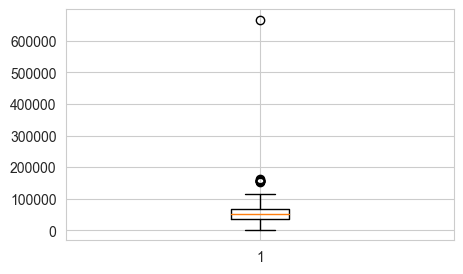

In [28]:
plt.figure(figsize=(5, 3))
boxplot = plt.boxplot(data["Income"])
plt.show()

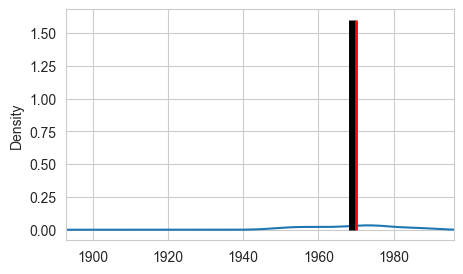

In [29]:
skewplot = data['Year_Birth'].plot(kind="density",
              figsize=(5,3),
              xlim=(data['Year_Birth'].min(),data['Year_Birth'].max()));
plt.vlines(data['Year_Birth'].mean(),
           ymin=0,
           ymax=1.6,
           linewidth=5.0,
           color="black");
plt.vlines(data['Year_Birth'].median(),
           ymin=0,
           ymax=1.6,
           linewidth=2.0,
           color="red");
plt.show()

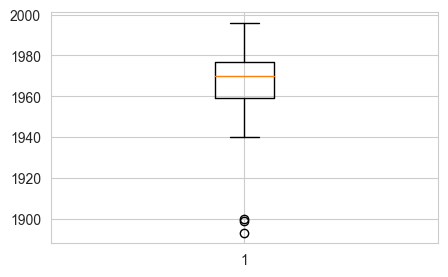

In [30]:
plt.figure(figsize=(5, 3))
boxplot = plt.boxplot(data["Year_Birth"])
plt.show()